# Part I - Exploring the Factors that Affect the Duration of Ford Bike Trips
## by Ayoub RHOUTTAISS
## Introduction
>The 2019 Ford bike ride dataset is a comprehensive collection of information on over 183215 bike rides taken using Ford bikes. This dataset holds a wealth of information and is comprised of 16 distinct columns, each providing valuable insights into various aspects of the bike rides. The data contained in this dataset was carefully collected and curated, making it a valuable resource for anyone looking to gain a deeper understanding of the Ford bike ride experience. With this dataset, we are able to delve into the details of each bike ride, from :
* start_time: The time the ride started
* end_time: The time the ride ended
* duration_sec: The length of the ride in seconds
* start_station_id: The id of the station where the ride began
* end_station_id: The id of the station where the ride ended
* start_station_name: The id of the station where the ride began
* end_station_name: The name of the station where the ride ended
* start_station_latitude: The GPS coordinates of the start station
* end_station_latitude: The GPS coordinates of the end station
* bike_id: The id of the bike used for the ride
* user_type: The type of user who rented the bike 
* member_gender: The gender of the user who rented the bike
* member_age: The age of the user who rented the bike




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Load the dataset "bike.csv" into a pandas DataFrame "df_bike" and displays the first 5 rows.

In [2]:
df_bike = pd.read_csv('bike.csv')
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Assessment

In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# looking for outliers
df_bike.nsmallest(15,'duration_sec')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
18578,61,2019-02-26 18:23:44.2830,2019-02-26 18:24:45.5230,368.0,Myrtle St at Polk St,37.785434,-122.419622,368.0,Myrtle St at Polk St,37.785434,-122.419622,5333,Subscriber,1989.0,Female,No
19581,61,2019-02-26 16:40:53.1210,2019-02-26 16:41:54.4510,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5306,Subscriber,1987.0,Female,No
27017,61,2019-02-25 10:31:18.4150,2019-02-25 10:32:19.7480,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5921,Subscriber,1972.0,Male,Yes
44301,61,2019-02-22 15:09:57.0480,2019-02-22 15:10:58.7420,310.0,San Fernando St at 4th St,37.335885,-121.885660,280.0,San Fernando St at 7th St,37.337122,-121.883215,6347,Subscriber,1989.0,Male,Yes
44787,61,2019-02-22 13:56:21.9760,2019-02-22 13:57:23.4650,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,81.0,Berry St at 4th St,37.775880,-122.393170,6150,Subscriber,1931.0,Male,No
51120,61,2019-02-21 18:27:34.9930,2019-02-21 18:28:36.6300,113.0,Franklin Square,37.764555,-122.410345,100.0,Bryant St at 15th St,37.767100,-122.410662,6515,Subscriber,1984.0,Male,No
58992,61,2019-02-20 21:44:00.1540,2019-02-20 21:45:01.2350,85.0,Church St at Duboce Ave,37.770083,-122.429156,85.0,Church St at Duboce Ave,37.770083,-122.429156,4351,Subscriber,1994.0,Male,No
64088,61,2019-02-20 13:08:18.2850,2019-02-20 13:09:19.4330,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,80.0,Townsend St at 5th St,37.775235,-122.397437,2090,Subscriber,1931.0,Male,No
80047,61,2019-02-18 16:31:12.8960,2019-02-18 16:32:14.5880,89.0,Division St at Potrero Ave,37.769218,-122.407646,101.0,15th St at Potrero Ave,37.767079,-122.407359,6195,Subscriber,1931.0,Male,No
82564,61,2019-02-18 09:53:31.3990,2019-02-18 09:54:33.1620,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,3054,Subscriber,1990.0,Male,No


In [7]:
# looking for outliers
df_bike.nlargest(15,'duration_sec')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No
85465,84548,2019-02-16 15:48:25.0290,2019-02-17 15:17:33.0800,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,6301,Subscriber,1981.0,Male,No
153705,83772,2019-02-05 12:44:54.2860,2019-02-06 12:01:06.6310,78.0,Folsom St at 9th St,37.773717,-122.411647,345.0,Hubbell St at 16th St,37.766483,-122.398279,3405,Customer,NaN,NaN,No
127999,83519,2019-02-09 15:16:17.5370,2019-02-10 14:28:17.2700,72.0,Page St at Scott St,37.772406,-122.435650,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5561,Customer,1990.0,Male,No
112435,83407,2019-02-11 16:25:33.0690,2019-02-12 15:35:40.9560,77.0,11th St at Natoma St,37.773507,-122.416040,344.0,16th St Depot,37.766349,-122.396292,1842,Customer,1988.0,Male,No
5203,83195,2019-02-27 14:47:23.1810,2019-02-28 13:53:58.4330,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,5781,Subscriber,1962.0,Female,Yes
95750,82512,2019-02-14 13:56:21.7280,2019-02-15 12:51:34.3150,368.0,Myrtle St at Polk St,37.785434,-122.419622,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6152,Customer,1998.0,Other,No
173365,82385,2019-02-02 13:07:43.0360,2019-02-03 12:00:48.1750,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,2933,Customer,NaN,NaN,No
8631,81549,2019-02-27 09:41:38.5520,2019-02-28 08:20:48.3860,138.0,Jersey St at Church St,37.750900,-122.427411,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,2266,Subscriber,1963.0,Female,No
176987,80891,2019-02-01 11:05:18.9760,2019-02-02 09:33:30.1690,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,55.0,Webster St at Grove St,37.777053,-122.429558,3133,Customer,NaN,NaN,No


In [8]:
df_bike['start_station_id'].value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
15.0     2710
30.0     2703
5.0      2327
22.0     2293
16.0     2283
6.0      2082
239.0    1796
243.0    1770
50.0     1765
66.0     1753
17.0     1746
27.0     1719
44.0     1611
90.0     1573
93.0     1552
23.0     1458
19.0     1376
245.0    1375
104.0    1360
61.0     1314
114.0    1303
126.0    1290
182.0    1276
350.0    1203
256.0    1203
         ... 
222.0      57
217.0      55
209.0      55
46.0       53
358.0      50
283.0      50
297.0      49
318.0      48
362.0      36
228.0      35
288.0      34
287.0      34
307.0      32
290.0      31
298.0      30
378.0      29
359.0      25
229.0      23
226.0      19
303.0      19
225.0      18
234.0      18
398.0      17
388.0      17
389.0      13
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [9]:
df_bike['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4857
Market St at 10th St                                               3973
Montgomery St BART Station (Market St at 2nd St)                   3647
San Francisco Ferry Building (Harry Bridges Plaza)                 3368
Powell St BART Station (Market St at 4th St)                       2997
San Francisco Caltrain (Townsend St at 4th St)                     2947
Berry St at 4th St                                                 2872
The Embarcadero at Sansome St                                      2512
Powell St BART Station (Market St at 5th St)                       2353
Steuart St at Market St                                            2338
Howard St at Beale St                                              2034
Civic Center/UN Plaza BART Station (Market St at McAllister St)    1865
Bancroft Way at Telegraph Ave                                      1814
Beale St at Harrison St                                         

In [10]:
df_bike['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [11]:
df_bike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [12]:
df_bike['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [13]:
# Let's create a copy of the principal DataFrame "df_bike" 
# and assigns it to "df_bike_clean"to keep to otiginal data safe.
df_bike_clean = df_bike.copy()

In [14]:
#Let's remove the rows with missing values in the "start_station_id" column from the DataFrame
df_bike_clean.dropna(subset=["start_station_id"], inplace=True)

In [15]:
df_bike_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [16]:
# Let's convert the "start_station_id" and "end_station_id" columns to integer data type.
df_bike_clean['start_station_id'] = df_bike_clean['start_station_id'].astype(int)
df_bike_clean['end_station_id'] = df_bike_clean['end_station_id'].astype(int)

In [17]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null object
end_time                   183215 non-null object
start_station_id           183215 non-null int64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null int64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 23.8+ MB


In [18]:
# Let's convert the "start_time" and "end_time" columns to datetime data type .
df_bike_clean['start_time'] = pd.to_datetime(df_bike_clean['start_time'])
df_bike_clean['end_time'] = pd.to_datetime(df_bike_clean['end_time'])

In [19]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183215 non-null int64
start_time                 183215 non-null datetime64[ns]
end_time                   183215 non-null datetime64[ns]
start_station_id           183215 non-null int64
start_station_name         183215 non-null object
start_station_latitude     183215 non-null float64
start_station_longitude    183215 non-null float64
end_station_id             183215 non-null int64
end_station_name           183215 non-null object
end_station_latitude       183215 non-null float64
end_station_longitude      183215 non-null float64
bike_id                    183215 non-null int64
user_type                  183215 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    183215 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object(5)
memory usage:

In [20]:
# Let's create a new column "member_age"  by subtracting the values 
# in the "member_birth_year" column from the current year 2023.
df_bike_clean['member_age'] = 2023 - df_bike_clean['member_birth_year']

In [21]:
# We don't need teh column 'member_birth_year' anymore.
df_bike_clean.drop('member_birth_year', axis=1, inplace= True)

In [22]:
df_bike_clean.sample(6)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age
125737,331,2019-02-11 06:23:45.848,2019-02-11 06:29:17.662,121,Mission Playground,37.759210,-122.421339,141,Valencia St at Cesar Chavez St,37.747998,-122.420219,1150,Subscriber,Male,No,30.0
69275,641,2019-02-19 19:47:36.308,2019-02-19 19:58:17.923,49,S Park St at 3rd St,37.780760,-122.394989,77,11th St at Natoma St,37.773507,-122.416040,5814,Subscriber,Male,No,28.0
151224,1542,2019-02-06 17:09:15.228,2019-02-06 17:34:57.313,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,31,Raymond Kimbell Playground,37.783813,-122.434559,4746,Subscriber,Male,No,55.0
175929,276,2019-02-02 13:02:46.689,2019-02-02 13:07:23.339,124,19th St at Florida St,37.760447,-122.410807,139,Garfield Square (25th St at Harrison St),37.751017,-122.411901,5125,Subscriber,Male,No,41.0
129171,636,2019-02-10 11:17:42.834,2019-02-10 11:28:19.789,355,23rd St at Tennessee St,37.755367,-122.388795,80,Townsend St at 5th St,37.775235,-122.397437,5350,Subscriber,Male,No,33.0
28704,296,2019-02-25 08:30:05.419,2019-02-25 08:35:02.408,49,S Park St at 3rd St,37.780760,-122.394989,66,3rd St at Townsend St,37.778742,-122.392741,4742,Subscriber,Male,No,54.0


### What is the structure of your dataset?
We are going to invistagate a 2019 dataset containing information on 183215 bike rides, comprised of 16 columns:
* start_time: The time the ride started
* end_time: The time the ride ended
* duration_sec: The length of the ride in seconds
* start_station_id: The id of the station where the ride began
* end_station_id: The id of the station where the ride ended
* start_station_name: The id of the station where the ride began
* end_station_name: The name of the station where the ride ended
* start_station_latitude: The GPS coordinates of the start station
* end_station_latitude: The GPS coordinates of the end station
* bike_id: The id of the bike used for the ride
* user_type: The type of user who rented the bike 
* member_gender: The gender of the user who rented the bike
* member_age: The age of the user who rented the bike




### What is/are the main feature(s) of interest in your dataset?

I will concentrate on the trip's duration and aim to determine other factors that impact it.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe that the user's type, gender, and age can have an influence on the trip's duration.

## Univariate Exploration

#### What is the average duration of a Ford bike trip?

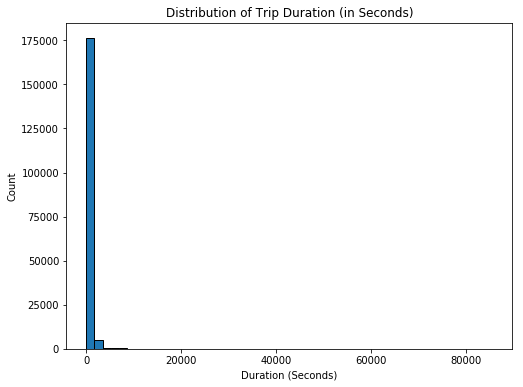

In [23]:
# Plot the distribution of duration_sec using a histogram
plt.figure(figsize=[8, 6])
plt.hist(df_bike_clean['duration_sec'], bins=50, edgecolor='black')
# Add a title and labels to the plot
plt.title('Distribution of Trip Duration (in Seconds)')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Count')
# Show the plot
plt.show()

The distribution of trip duration is skewed to the right. let't first convert the durations from secondes to minutes and then we will deal with the outliers.

In [24]:
# convert the trip durations from secondes to minutes
df_bike_clean['duration_min'] = df_bike_clean['duration_sec']/60

In [25]:
df_bike_clean['duration_min'].sample(8)

25487     16.800000
167590     9.516667
137775     5.550000
99323      7.400000
155073     9.150000
68918     23.300000
92501     10.450000
173798     7.416667
Name: duration_min, dtype: float64

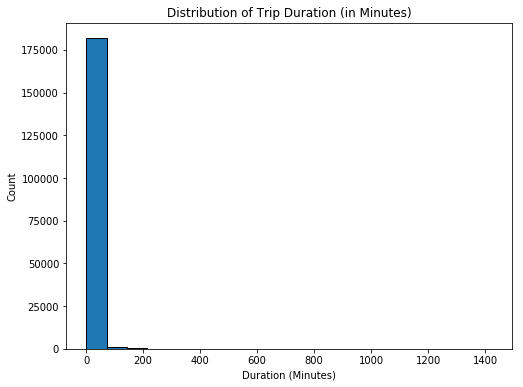

In [26]:
plt.figure(figsize=[8, 6])
plt.hist(df_bike_clean['duration_min'], bins=20, edgecolor='black')
# Add a title and labels to the plot
plt.title('Distribution of Trip Duration (in Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
# Show the plot
plt.show()

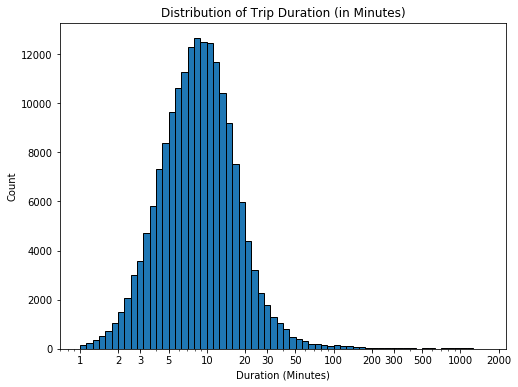

In [27]:
ticks = [1, 2, 3, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000]
ticks_values =  [1, 2, 3, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000, 2000]
# Maek a function to easeily change the ticks 
def plot_duration_distribuation(ticks,ticks_values):
    log_binsize = 0.05
    bins = 10 ** np.arange(0, np.log10(df_bike_clean['duration_min'].max())+log_binsize, log_binsize)
    plt.figure(figsize=[8, 6])
    plt.hist(df_bike_clean['duration_min'], bins=bins, edgecolor='black')
    # Add a title and labels to the plot
    plt.xscale('log')
    plt.title('Distribution of Trip Duration (in Minutes)')
    plt.xticks(ticks,ticks_values)
    plt.xlabel('Duration (Minutes)')
    plt.ylabel('Count')
    # Show the plot
    plt.show()
plot_duration_distribuation(ticks,ticks_values)

We have noticed that the distribution of trip duration is concentrated between 1 and 200 minutes. However, there are some outliers that we will delete to prepare this column for analysis.

In [28]:
# filter the data frame to remove outliers fromduration_min column
df_bike_clean = df_bike_clean[df_bike_clean['duration_min'] <= 200]

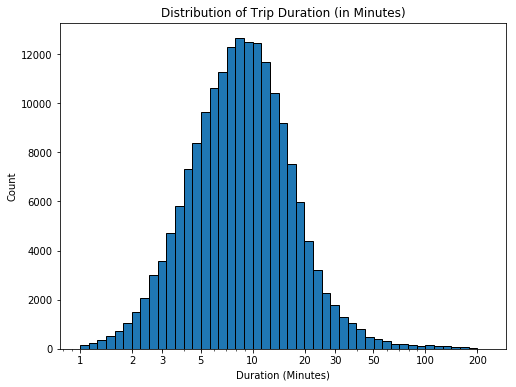

In [29]:
# After deleting the outliers let's plot with other convenient ticks
ticks = [1, 2, 3, 5, 10, 20, 30, 50, 100, 200]
ticks_values =  [1, 2, 3, 5, 10, 20, 30, 50, 100, 200]
plot_duration_distribuation(ticks,ticks_values)

#### Which gender uses bike trips more frequently?

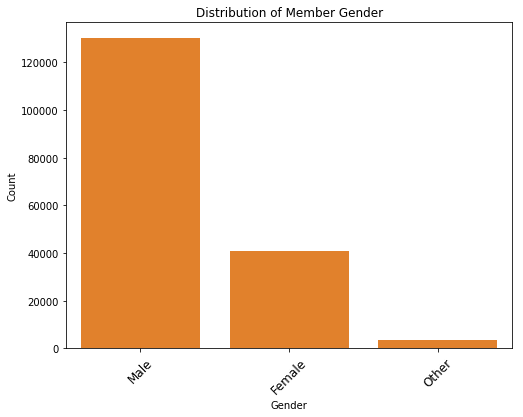

In [30]:
# let's plot the distribuation of members age 
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[1]
sb.countplot(x='member_gender', data=df_bike_clean, color= base_color)
plt.title("Distribution of Member Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45, fontsize=12)
plt.show()

It's clear that men are the group that takes more rides.

#### Which user type is more prevalent?

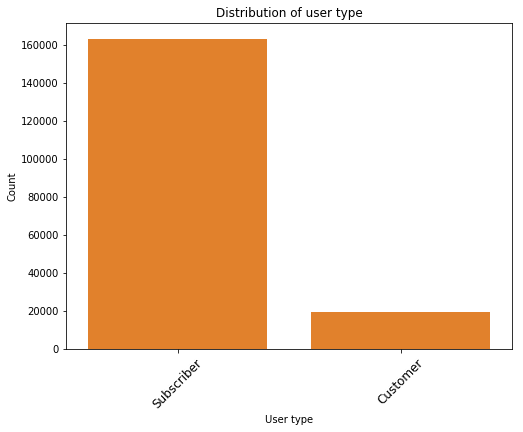

In [31]:
# let's plot the distribuation of users type
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[1]
sb.countplot(x='user_type', data=df_bike_clean, color= base_color)
plt.title("Distribution of user type")
plt.xlabel("User type")
plt.ylabel("Count")
plt.xticks(rotation=45, fontsize=12)
plt.show()

The majority of rides are taken by subscribers."

#### Which age category uses bike trips more frequently?

In [32]:
df_bike_clean['member_age'].describe()

count    174654.000000
mean         38.196755
std          10.120591
min          22.000000
25%          31.000000
50%          36.000000
75%          43.000000
max         145.000000
Name: member_age, dtype: float64

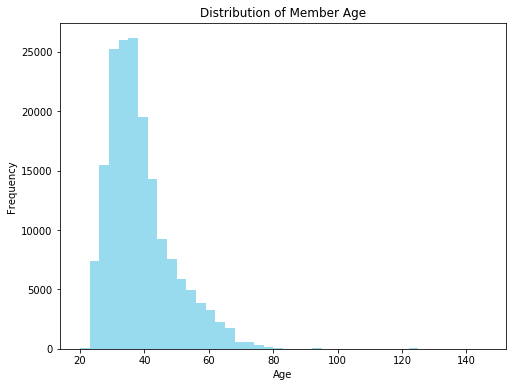

In [33]:
# let's plot the age distribuation 
def plot_age_distribuation():
    binsize = 3
    bins = np.arange(df_bike_clean['member_age'].min()-2,
                     df_bike_clean['member_age'].max()+binsize, binsize)
    plt.figure(figsize=[8, 6])
    sb.distplot(df_bike_clean['member_age'].dropna(), kde=False, bins = bins, color='#00A6D6')
    plt.title("Distribution of Member Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()
plot_age_distribuation()

We have noticed thatthere are some outliers that we will delete to prepare this column for analysis. Also we are going to delete the rides taht the age of thier user is unknown.

In [34]:
# Let's remove the rows with missing values in the "member_age" column from the DataFrame
df_bike_clean.dropna(subset=["member_age"], inplace= True)

In [35]:
# Only retain the rides taken by individuals aged 80 or younger (eliminating outliers).
df_bike_clean = df_bike_clean[df_bike_clean['member_age'] <= 80]

In [36]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174421 entries, 4 to 183411
Data columns (total 17 columns):
duration_sec               174421 non-null int64
start_time                 174421 non-null datetime64[ns]
end_time                   174421 non-null datetime64[ns]
start_station_id           174421 non-null int64
start_station_name         174421 non-null object
start_station_latitude     174421 non-null float64
start_station_longitude    174421 non-null float64
end_station_id             174421 non-null int64
end_station_name           174421 non-null object
end_station_latitude       174421 non-null float64
end_station_longitude      174421 non-null float64
bike_id                    174421 non-null int64
user_type                  174421 non-null object
member_gender              174421 non-null object
bike_share_for_all_trip    174421 non-null object
member_age                 174421 non-null float64
duration_min               174421 non-null float64
dtypes: datetime64[ns

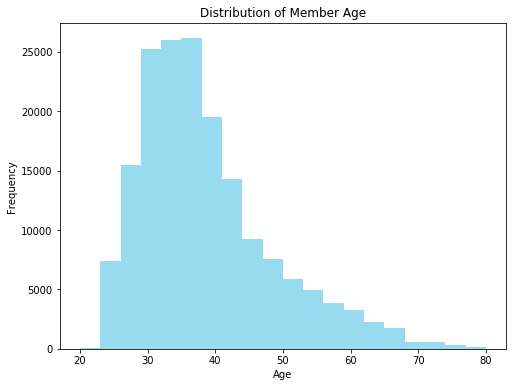

In [37]:
plot_age_distribuation()

Young people between the ages of 20 and 40 are the most represented age group.



> I converted the trip duration from seconds to minutes for ease of analysis. The distribution is concentrated between 1 and 200 minutes, so I removed the outliers

> I have replaced the 'member_birth_year' column with 'member_age', which is calculated by subtracting the birth year from the current year, so we can analyze the effect of age. Additionally, I have deleted the rides that don't have an age, and I have also removed the outliers in the 'member_age' column to obtain clearer results

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [60]:
# create a function that con plot the correlation between trip duration and any quantitive column
def  correlation_with_trip_duration(column):
    plt.figure(figsize=[8, 6])
    plt.scatter((df_bike_clean[column]), df_bike_clean['duration_min'], alpha=0.3, color = 'red')
    plt.xlabel(column,fontsize=14)
    plt.ylabel('Trip duration (in minutes)',fontsize=14)
    plt.title('Correlation between {} and Trip Duration'.format(column), fontsize=16)
    sb.despine()
    sb.set_style("whitegrid")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

#### Does age affect the duration of bike trips?

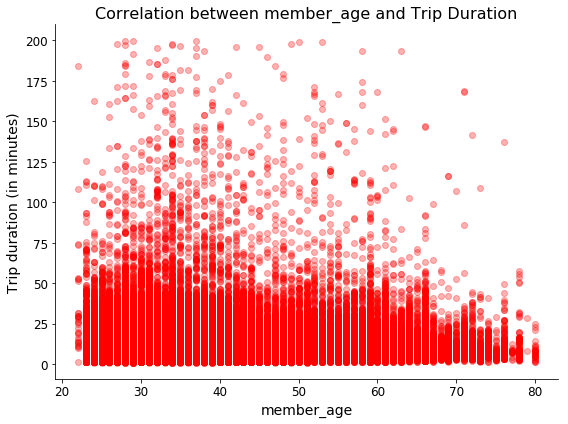

In [40]:
# using the function to plot the correaltion between the member age and the duartion
correlation_with_trip_duration('member_age')

Young people are taking more extended trips

In [41]:
# create a function that con plot the correlation between trip duration 
# and any categorical column.
# with 2 parametrs to manage limitaions
def correlation_with_categories(column,lim,limy_value):
    plt.figure(figsize=[8, 6])
    sb.set_style("whitegrid")
    base_color = sb.color_palette()[1]
    sb.boxplot(x=column, y='duration_min', data=df_bike_clean,color=base_color)
    if (lim):
        plt.ylim([0,limy_value])
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Duration (minutes)', fontsize=14)
    plt.title('Correlation between Duration of Bike Trips and {}'.format(column.capitalize()), fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

#### Do subscribers tend to take longer trips?

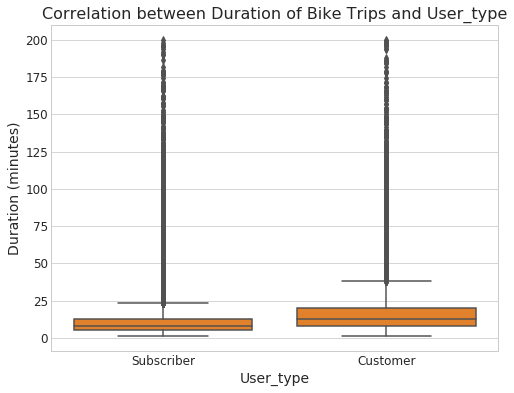

In [42]:
# using the function to plot the correlation between the user_type and the duartion
correlation_with_categories('user_type',False,0)

This plot is not a clear vision

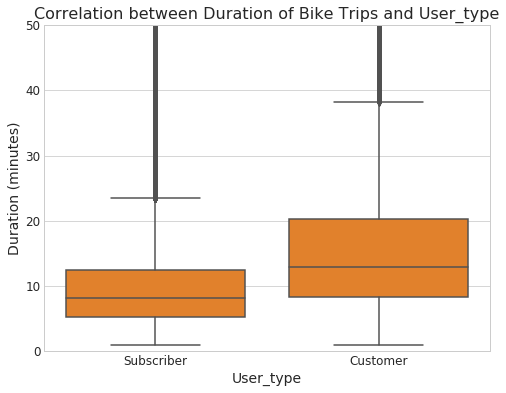

In [43]:
# use the limitaions parameters
correlation_with_categories('user_type',True,50)

Customers tend to take long trips more than subscribers.

#### Which gender takes longer trips?

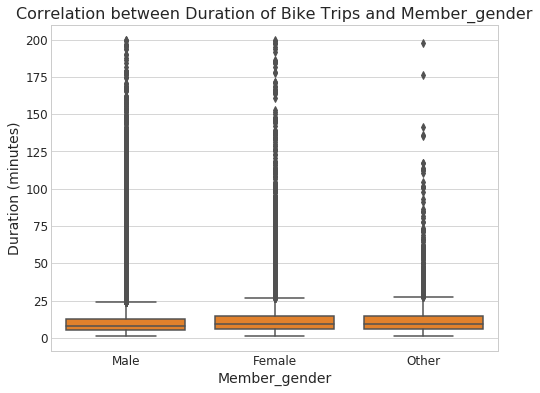

In [44]:
correlation_with_categories('member_gender',False,0)

This plot is not given a clear vision

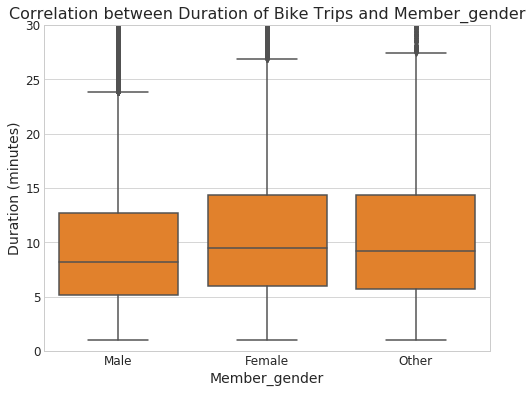

In [61]:
# use the limitaions parameters to get better results
correlation_with_categories('member_gender',True,30)

Females and Others are tend to take lonegest trips

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a clear correlation between age and trip duration, with younger people between 20 and 40 years old making the longest trips.
Although there is a high number of subscribers, they tend to make shorter trips in comparison to customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It was surprising that males make the most trips of short duration.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Can we find additional relationships through multivariate explorations?

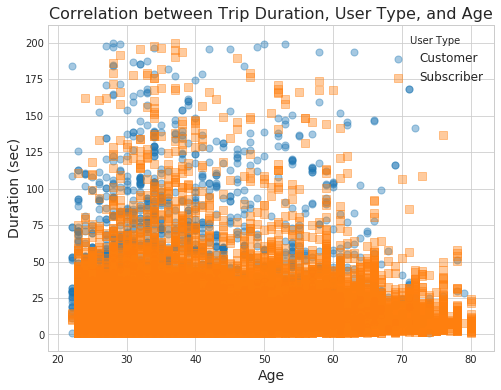

In [53]:
# Let's plot the correlation between trip duration, user type and age using scatter plot
plt.figure(figsize=[8, 6])
sb.set_style("whitegrid")
#  create two separate scatter plots, one for each user type, and distinguish them by using different markers ('o' and 's').
type_marks = [['Customer', 'o'],['Subscriber', 's']]
for user_type, marker in type_marks:
    df_type = df_bike_clean[df_bike_clean['user_type'] == user_type]
    plt.scatter(x=df_type["member_age"], y=df_type["duration_min"], marker=marker, s=50, label=user_type, alpha=0.4)
plt.legend(title="User Type", fontsize=12)
plt.title('Correlation between Trip Duration, User Type, and Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Duration (sec)', fontsize=14)
plt.show()


Young Customers are taking more extended trips

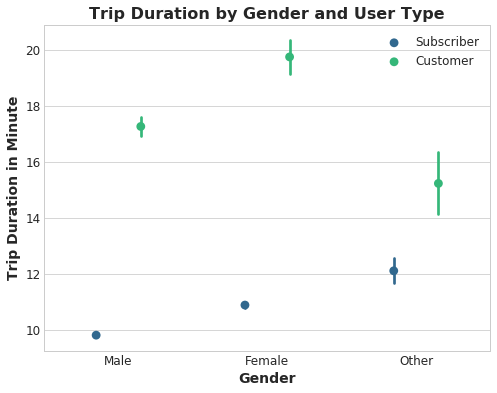

In [47]:
# Let's plot the correlation between trip duration, user type and gender using pointplot
plt.figure(figsize=[8, 6])
sb.set_style("whitegrid")
sb.pointplot(data=df_bike_clean, x='member_gender', y='duration_min', hue='user_type', dodge=0.3, linestyles="", palette='viridis')
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Trip Duration in Minute', fontsize=14, fontweight='bold')
plt.title('Trip Duration by Gender and User Type', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Female Customers are taking more long trips

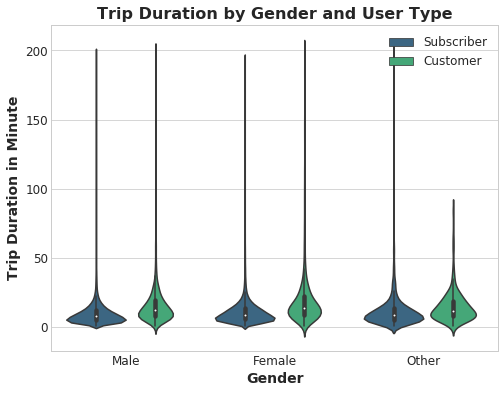

In [48]:
# Let's plot the correlation between trip duration, user type and gender using violinplot
plt.figure(figsize=[8, 6])
sb.set_style("whitegrid")
sb.violinplot(data=df_bike_clean, x='member_gender', y='duration_min', hue='user_type', dodge=0.3, linestyles="", palette='viridis')
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Trip Duration in Minute', fontsize=14, fontweight='bold')
plt.title('Trip Duration by Gender and User Type', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

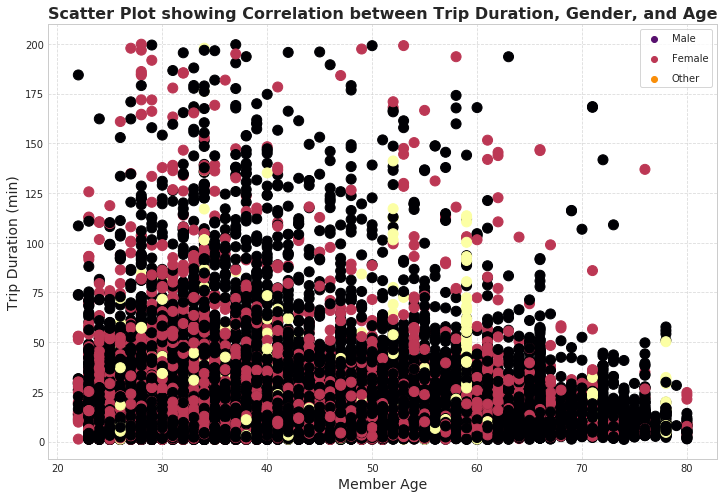

In [49]:
# Let's plot the correlation between trip duration, user type and gender using scatterplot
plt.figure(figsize=(12, 8))
gender_mapping = {'Male': 1, 'Female': 2, 'Other': 3}
df_bike_clean['member_gender_num'] = df_bike_clean['member_gender'].map(gender_mapping)
plt.scatter(x=df_bike_clean["member_age"], y=df_bike_clean["duration_min"], c=df_bike_clean["member_gender_num"], cmap="inferno", s=100)
plt.title("Scatter Plot showing Correlation between Trip Duration, Gender, and Age", fontsize=16, fontweight='bold')
plt.xlabel("Member Age", fontsize=14)
plt.ylabel("Trip Duration (min)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
# Create legend
legend_labels = ['Male', 'Female', 'Other']
legend_colors = sb.color_palette("inferno", n_colors=3)
legend_handles = [plt.scatter([], [], c=color,) for color in legend_colors]
plt.legend(legend_handles, legend_labels, scatterpoints=1, frameon=True, labelspacing=1, loc='upper right')

plt.show()


In [38]:
# Save cleaned dataframe
df_bike_clean.to_csv('df_bike_clean.csv', index=False)

Young females are taking more extended trips

The results of the multivariate analysis confirm and support the impressions gleaned from the bivariate and univariate visualizations: it appears that females, customers and young people are the demographic groups primarily responsible for taking long trips.



It is intriguing that females tend to take longer trips than males, but there is a significant disparity in the percentage of rides taken by males and females, making it challenging to draw a definite conclusion.

## Conclusions
First, I assessed the data visually, which led me to make some changes such as adding the column 'member_age', calculated from the birth date. I also cleaned the dataset of rides that had critical information missing. During the visualization, I had to deal with outliers to obtain clearer results. As a result of this whole process, I obtained the following results:
The conclusion of the data analysis is that there is a clear correlation between age and trip duration, with younger people between 20 and 40 years old making the longest trips. It was found that subscribers tend to make shorter trips compared to customers. The results of the analysis suggest that the demographic groups primarily responsible for taking long trips are females, customers, and young people. However, the disparity in the percentage of rides taken by males and females makes it challenging to draw a definite conclusion about the differences in trip duration between the two genders.